# Expectation Maximization on Gaussian Mixture Models

Idea of this notebook is to learn EM (Expectation Maximization) algorithm by applying it to GMM.

![](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif)

## Gaussian Mixture Model - Algorithm

Assume that we know that our dataset consists of mixture of `K` multinomial Gaussian distributions (mixture of Gaussian's). We want to estimate mean and variance for each Gaussian. We could (in theory) do that by using `Maximum Likelihood (ML)` method since we have dataset samples:

\begin{align}
L(w) = \prod^{N}_{i=1} N_w(x_i) = \prod^{n}_{i=1} \cdot \sum^{K}_{j=1} p_w(z=j) \cdot N_w(x_i|z=j) \tag{1}
\end{align}


Here `L` is the likelihood function given the set of parameters `w` (mean's and std's), `N` is the number of samples, `K` is the number of clusters, `z` is the cluster color (latent variable). Finally, $N_w(x)$ is `pdf (Probability Distribution Function)` for sample $x_i$ given the parameters $w$, $p_w(z=j)$ is probability of sample $x_i$ belonging to the cluster $j$ and $N_w(x_i|z=j) = N_w(x_i|\mu_j, \Sigma_j)$ is `pdf` for sample $x_i$ assuming that it belongs to cluster $j$ given the parameters $w$ (mean - $\mu_j$ and variance $\Sigma_j$). Note: second equation stands because of the [law of total probability](https://en.wikipedia.org/wiki/Law_of_total_probability). We want to find parameters $w$ that maximizes $L$ function. This is equivalent to finding the maximum of `log(L)` since `log` in an increasing function. Using the `log` simplifies optimization function (product becomes sum).

\begin{align}
l(w) = log(L(w)) = \sum^{N}_{i=1} log(\sum^{K}_{j=1} p_w(z=j) \cdot p_w(x_i|z=k)) \tag{2}
\end{align}

In special case `K=1` for $(2)$ we have

\begin{align}
l(w) = \sum^{n}_{i=1} log(p_w(x_i)) \tag{3}
\end{align}

and this can easily be solved analytically by finding $w$ where $\frac{dl}{dw} = 0$, $\frac{d^{2}l}{dw^2} < 0$.

Unfortunately, this problem is a lot harder in general case since `log` can't pass through the sum. If we set the derivatives of the log likelihood to zero, we will no longer obtain closed form solution. If we replace $N_w(x_i|z=j) = N_w(x_i|\mu_j, \Sigma_j)$ in $l(w)$ we get:

\begin{align}
l(w) = \sum^{N}_{i=1} log(\sum^{K}_{j=1} p_w(z=j) \cdot N_w(x_i|\mu_j, \Sigma_j)) \tag{4}
\end{align}

It is important to see that we also need to estimate $p_w(z=j)$. Our intuition tells us  that $p_w(z=j)$ should be equal to $\sum^{N}_{i=1} p_w(z=j|x_i)$. This approximation makes sense since if distribution of $x$ (data) was known then $p(z=j) = \int_x p(z=j,x) = \int_x p(z=j|x) \cdot p(x)$ ([marginal distribution](https://en.wikipedia.org/wiki/Marginal_distribution)). Later we will show that approximation is valid. For the estimation we use $\pi_j \approx p_w(z = j)$ with constraint which will be important later. We call this quantity `prior` for better understanding intuition but that assumption is not formal or completely correct:

\begin{align}
\sum_{j} \pi_j = 1 \tag{5}.
\end{align}

Now the log likelihood function has next form:

\begin{align}
l(w) = \sum^{N}_{i=1} log(\sum^{K}_{j=1} \pi_j \cdot N_w(x_i|\mu_j, \Sigma_j)) \tag{6}
\end{align}

From this form we can express derivatives with respect to $\mu_j$ and $\Sigma_j$:

\begin{align}
\frac{dl}{d\mu_j} = \sum^{n}_{i=1} \frac{\pi_j \cdot N_w(x_i|\mu_j, \Sigma_j)}{\sum^{K}_{t=1} \pi_t \cdot N_w(x_i|\mu_t, \Sigma_t)} \cdot \frac{1}{(2 \cdot \pi)^{\frac{n}{2}} \times |\Sigma|^{\frac{1}{2}}} \tag{7}
\end{align}

Note: $\frac{dN_w(x_i|\mu_j, \Sigma_j)}{d\mu_j} = \Sigma_j \cdot (x_i - \mu_j) \cdot \frac{1}{(2 \cdot \pi)^{\frac{n}{2}} \times |\Sigma|^{\frac{1}{2}}}$ and it can be easily calculated when expressing the full multinomial Gaussian distribution formulation:

\begin{align}
N(x|\mu,\Sigma) = \frac{1}{(2 \cdot \pi)^{\frac{n}{2}} \times |\Sigma|^{\frac{1}{2}}} \cdot exp(−\frac{1}{2} \cdot (x − \mu)^{T} \Sigma^{-1} (x − \mu)) \tag{8}
 \end{align}

where $n$ is the dimensionality.

Also note that $\frac{\pi_j \cdot N_w(x_i|\mu_j, \Sigma_j)}{\sum^{K}_{t=1} \pi_t \cdot N_w(x_i|\mu_t, \Sigma_t)}$ in $(7)$ is actually a `posterior` $p(z=j|x_i)$ ([Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)) if $\pi_j$ is a `prior`. We define $\gamma_{j,x_i} := p(z=j|x_i)$ for more compact formulas. By replacing $\gamma_{j,x_i}$ in $(7)$ we get:

\begin{align}
\frac{dl}{d\mu_j} = \sum^{n}_{i=1} \gamma_{j,x_i} \cdot \Sigma_j \cdot (x_i - \mu_j) \cdot \frac{1}{(2 \cdot \pi)^{\frac{n}{2}} \times |\Sigma|^{\frac{1}{2}}}\tag{9}
\end{align}

Setting the derivatives of the gradient to zero we can get optimal $\mu_j$ (proof that this is local maximum is skipped). Constant multiplier on the right can be removed immediately:

\begin{align}
\sum^{n}_{i=1} \gamma_{j,x_i} \cdot \Sigma_j \cdot (x_i - \mu_j) = 0 \tag{10}
\end{align}

We multiply left side by $\Sigma^{-1}$ assuming that is not a singular matrix:

\begin{align}
\sum^{n}_{i=1} \gamma_{j,x_i} \cdot (x_i - \mu_j) = 0 \tag{11}
\end{align}

From here we express $\mu_j$:

\begin{align}
\mu_j = \frac{\sum^{n}_{i=1} \gamma_{j,x_i} \cdot x_i}{\sum^{n}_{t=1} \gamma_{j,x_t}} \tag{12}
\end{align}

We define $N_j = \sum^{n}_{i=1} \gamma_{j,i_t}$ as effective number of points assigned to the cluster $j$ - sum of all probabilities for each point that it belongs to cluster $j$. Thus:

\begin{align}
\mu_j = \frac{1}{N_j} \cdot \sum^{n}_{i=1} \gamma_{j,x_i} \cdot x_i \tag{13}
\end{align}

In similar way we get:

\begin{align}
\Sigma_j = \frac{1}{N_j} \cdot \sum^{n}_{i=1} \gamma_{j,x_i} \cdot (x_i - \mu_j)(x_i - \mu_j)^T \tag{14}
\end{align}

For $\pi_j$ we need to include constraint $(5)$. This can be achieved using [Lagrange multiplier](https://en.wikipedia.org/wiki/Lagrange_multiplier) and maximizing $G(\pi_1, \pi_2, ..., \lambda)$:

\begin{align}
G(\pi_1, \pi_2, ..., \lambda) = l(w) + \lambda \cdot (\sum_{j} \pi_j - 1) \tag{15}
\end{align}

Hence, we have:

\begin{align}
0 = \frac{dG}{d\pi_j} = \sum^{N}_{i}\frac{N_w(x_i|\mu_j, \Sigma_j)}{\sum^{K}_{t=1} \pi_t \cdot N_w(x_i|\mu_t, \Sigma_t)} + \lambda \tag{16}
\end{align}

If we multiply both sides by $\pi_j$ sum them for each $0 = \frac{dG}{d\pi_j}$ (for every $j$) we get:

\begin{align}
0 = \sum^{N}_{i}\frac{\sum^{K}_{j=1} \pi_j \cdot N_w(x_i|\mu_j, \Sigma_j)}{\sum^{K}_{t=1} \pi_t \cdot N_w(x_i|\mu_t, \Sigma_t)} + \pi_j \cdot \lambda = N + \pi_j \cdot \lambda \tag{17}
\end{align}

Hence from $(16)$ by multiplying it by $\pi_j$ we get:

\begin{align}
0 = \sum^{N}_{i}\frac{\pi_j \cdot N_w(x_i|\mu_j, \Sigma_j)}{\sum^{K}_{t=1} \pi_t \cdot N_w(x_i|\mu_t, \Sigma_t)} - \pi_j \cdot N
= \sum^{N}_{i} \gamma_{j,x_i} - \pi_j \cdot N \tag{18}
\end{align}

And finally:

\begin{align}
\pi_j = \frac{N_j}{N} \tag{19}
\end{align}

where $N_j := \sum^{N}_{i} \gamma_{j,x_i}$.

Key formulas are $(12)$, $(14)$ and $(19)$:

\begin{align}
\mu_j = \frac{1}{N_j} \cdot \sum^{n}_{i=1} \gamma_{j,x_i} \cdot x_i
\end{align}\begin{align}
\Sigma_j = \frac{1}{N_j} \cdot \sum^{n}_{i=1} \gamma_{j,x_i} \cdot (x_i - \mu_j)(x_i - \mu_j)^T
\end{align}\begin{align}
\pi_j = \frac{N_j}{N}
\end{align}

Note that $(12)$ is slightly modified into a more compact format.

Problem is that our all estimations depend on $\gamma_{j,x_i}$ (posterior latent variable distribution) which requires estimated parameters. Thus, this solution is not a closed form solution. On other hand they give us iterative algorithm where we can use some starting values for $\mu_j$, $\Sigma_j$ and $pi_j$ (E step), calculate $\gamma_{j,x_i}$ (M step) and then use it to estimate new parameters and likelihood. This is Expectation Minimization (EM) algorithm which guarantees in each step that the likelihood increases.

## Expectation Minimization

Expectation minimization algorithm is a generic optimization algorithm used estimate model parameters that give (local) maximum likelihood in cases when the data is not completely observed or missing.

We denote $X$ as set of all observed data, $Z$ as set of latent variables and $\Theta$ as set of all model parameters. Log likelihood function is given by:

\begin{align}
l(\Theta) = log(p(X|\Theta)) = log(\sum_Z p(X,Z|\Theta) )\tag{20}
\end{align}

This function is usually hard to optimize even if the distribution $p(X,Z|\Theta)$ comes from the exponential family since logarithm can't pass through the sum. If we have all information about latent variable Z then we could easily estimate parameters $\Theta$ by optimizing likelihood of the combined $X$ and $Z$: $l(\Theta) = p(X,Z|\Theta)$. Assuming that instead of full data, we only have knowledge of the $Z$ based on the posterior distribution $p(Z|X,\Theta)$ (we can estimate $Z$ if we have $X$ and $\Theta$) then we can replace log likelihood with the expectation of log likelihood using the posterior distribution $p(Z|X,\Theta)$ and using the current estimated parameters:

\begin{align}
Q(\Theta) = \sum_Z p(Z|X,\Theta) \cdot log(p(X,Z|\Theta))\tag{21}
\end{align}

The last part does not seem so intuitive - why can we replace log likelihood with the expectation of log likelihood using posterior distribution of $Z$? For full explanation please refer to the well known book `Pattern Recognition and Machine Learning` by Christopher M. Bishop, since it may require few pages for full algorithm explanation. This section is just a grasp on the full algorithm.

During the `E` step we are evaluating the posterior distribution $p(Z|X,\Theta_{old})$ where the parameters $\Theta_{old}$ are fixed parameters. During the `M` step we are estimating parameters by optimizing the expected log likelihood $Q(\Theta, \Theta_{old}) = \sum_Z p(Z|X,\Theta_{old}) \cdot log(p(X,Z|\Theta))$ where the posterior distribution $p(Z|X,\Theta_{old})$ is fixed. By repeating `E` and `M` steps many times we convert to some local maxima (or saddle point).

## Algorithm (EM for GMM)

0. Initialize model initial parameters $\mu_j$, $\Sigma_j$ and $\pi_j$ for every cluster $j$.
1. **Expectation:** Evaluate $\gamma_{j, x_i}$ for every cluster $j$ and data sample $x_i$.
2. **Maximization:** Estimate parameters $\mu_j$, $\Sigma_j$ and $\pi_j$ for every cluster based on $\gamma_{j, x_i}$.
3. Evaluate `log_likelihood` based on the model estimated parameters.

## Implementation

In this section the GMM model will be implemented based on the previous introduction theory. Model will be first tested on 1d dataset and then on the 2d dataset.

In [1]:
from typing import List, Tuple, Optional, Dict, Any, Callable

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris


np.random.seed(42)


### Dataset creation and visualization

It will be useful to have support for custom dataset generation and visualization.

#### Visualization support for 1D

For visualization `matplotlib` library is used. For Mixture of Gaussian visualization it is important to have two components:
- Visualization of Gaussian pdf (probability distribution function);
- Visualization of data points (and their cluster color).

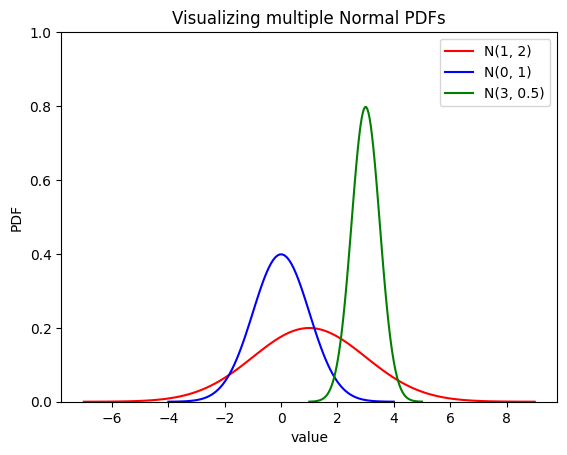

In [2]:
def plot_1d_gaussian_pdf(
    mean: float,
    std: float,
    std_range: Tuple[int, int] = (-3, 3),
    n_points: int = 100,
    ax: Optional[plt.Axes] = None,
    plot_params: Optional[Dict[str, Any]] = None
) -> None:
    """
    Plots 1d Gaussian. Supports matplotlib Axes.

    Args:
        mean: Mean (center)
        std: Std
        std_range: [a, b] - plot from -a*std to +b*std
        n_points: Number of points on plot (more points -> better precision)
        ax: Plot on Axes
        plot_params: Parameters for plot (e.g. color, label, line-width, ...)
    """
    plot_params = plot_params if plot_params is not None else {}
    a, b = std_range

    # Sample points around mean uniformly and calculate pdf for them
    x = np.linspace(mean + a * std, mean + b * std, n_points)
    y = stats.norm.pdf(x, mean, std)

    if ax is None:
        plt.plot(x, y, **plot_params)
    else:
        ax.plot(x, y, **plot_params)


# Test distribution plotting
s_range = (-4, 4)
plot_1d_gaussian_pdf(1, 2, plot_params={'color': 'red', 'label': 'N(1, 2)'}, std_range=s_range)
plot_1d_gaussian_pdf(0, 1, plot_params={'color': 'blue', 'label': 'N(0, 1)'}, std_range=s_range)
plot_1d_gaussian_pdf(3, 0.5, plot_params={'color': 'green', 'label': 'N(3, 0.5)'}, std_range=s_range)
plt.xlabel('value')
plt.ylabel('PDF')
plt.title('Visualizing multiple Normal PDFs')
plt.ylim((0, 1))
plt.legend()
plt.show()

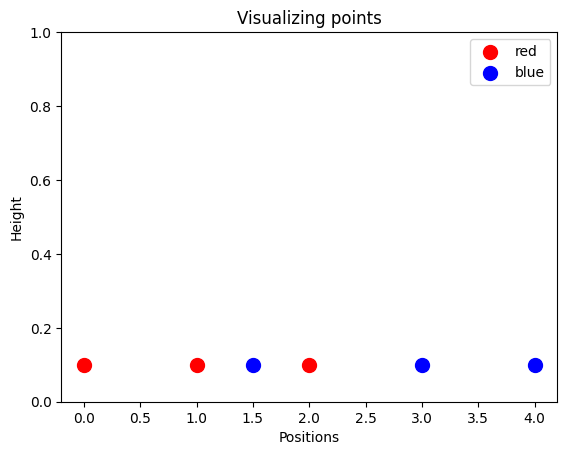

In [3]:
def plot_1d_points(
    points: np.ndarray,
    height: float = 0.1,
    ax: Optional[plt.Axes] = None,
    plot_params: Optional[Dict[str, Any]] = None
) -> None:
    """
    Plots list of 1D points on a horizontal line.

    Args:
        points: Point positions
        height: Default y-axis point position (height)
        ax: Plot on Axes
        plot_params: Parameters for plot (e.g. color, label, line-width, ...)
    """
    plot_params = plot_params if plot_params is not None else {}
    y = np.ones_like(points) * height

    if ax is None:
        plt.scatter(points, y, **plot_params)
    else:
        ax.scatter(points, y, **plot_params)


# Test plot colored points
plot_1d_points(np.array([[0, 1, 2]]), plot_params={'color': 'red', 's': 100, 'label': 'red'})
plot_1d_points(np.array([[1.5, 3, 4]]), plot_params={'color': 'blue', 's': 100, 'label': 'blue'})
plt.title('Visualizing points')
plt.xlabel('Positions')
plt.ylabel('Height')
plt.ylim((0, 1))
plt.legend()
plt.show()

#### Dataset generation (and visualization)

Synthetic dataset from the mixture of Gaussians can be easily sampled by sampling some number of points for each Gaussian (cluster).

Dataset can be easily visualized using previously implemented support visualization functions.

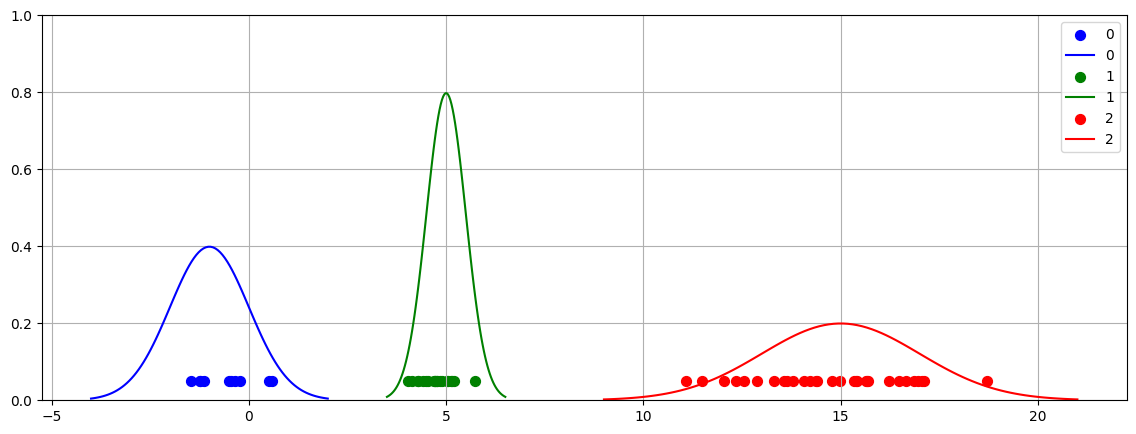

In [4]:
def create_1d_cluster_dataset(n: int, sizes: List[int], means: List[float], stds: List[float]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Creates dataset consisting of `n` Gaussian clusters with defined sizes, means and stds.

    Args:
        n: Number of clusters
        sizes: Cluster sizes (list of sizes for each of n clusters)
        means: Cluster means (list of means for each of n clusters)
        stds: Cluster stds (list of stds for each of n clusters)

    Returns:
        Samples, Sample colors (clusters
    """
    assert n == len(sizes)
    assert n == len(means)
    assert n == len(stds)

    positions = []
    colors = []
    for c_id, (c_size, c_mean, c_std) in enumerate(zip(sizes, means, stds)):
        p = np.random.randn(c_size) * c_std + c_mean
        c = np.ones(c_size) * c_id
        positions.append(p)
        colors.append(c)

    positions = np.hstack(positions).reshape(-1, 1)
    colors = np.hstack(colors)
    return positions, colors


def plot_1d_clusters(
    positions: np.ndarray,
    colors: np.ndarray,
    n_clusters: int,
    means: List[float],
    stds: List[float],
    ax: Optional[plt.Axes] = None,
    color_list: Optional[List[str]] = None,
    points_height: float = 0.1
) -> None:
    """
    Visualizes 1d clusters and data points with their cluster classes (colors).

    Args:
        positions: List (array) of 1D points.
        colors: List (array) of point cluster colors
        n_clusters: Number of clusters
        means: Cluster means
        stds: Cluster stds
        ax: matplotlib Axes
        color_list: Specify manually list of colors to be used (with order)
        points_height: points height
    """
    assert n_clusters == len(means)
    assert n_clusters == len(stds)

    if color_list is None:
        color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
        assert n_clusters <= len(color_list), 'Not enough colors. Please define color list!'


    for cluster_id, (cluster_mean, cluster_std) in enumerate(zip(means, stds)):
        ps = np.array([p for p, c in zip(positions, colors) if c == cluster_id])
        cluster_color = color_list[cluster_id]
        plot_1d_points(ps, ax=ax, plot_params={'color': cluster_color, 'label': f'{cluster_id}', 's': 50}, height=points_height)
        plot_1d_gaussian_pdf(cluster_mean, cluster_std, ax=ax, plot_params={'color': cluster_color, 'label': f'{cluster_id}'})

    if ax is None:
        plt.ylim((0, 1))
        plt.legend()
        plt.grid()
    else:
        ax.legend()
        # noinspection PyTypeChecker
        ax.set_ylim((0, 1))
        ax.grid()


# Test dataset generation and visualization
ex_n = 3
ex_sizes = [10, 20, 30]
ex_means = [-1, 5, 15]
ex_stds = [1, 0.5, 2]
ex_pis = [1/6, 1/3, 1/2]
_, ex_ax = plt.subplots(figsize=(14, 5))
point_positions, point_colors = create_1d_cluster_dataset(3, ex_sizes, ex_means, ex_stds)
plot_1d_clusters(point_positions, point_colors, n_clusters=ex_n, means=ex_means, stds=ex_stds, ax=ex_ax, points_height=0.05)
plt.show()

### GMM Implementation

The EM algorithm expects some initial values for the parameters. We can use some simple algorithm (heuristic) to generate them. Later on we can check if better heuristic can improve the algorithm speed by lowering the number of iterations to converge (with a better starting point).

For default heuristic we will sample random points between minimum and maximum values in the dataset. These random points are initial cluster means. For covariance matrix a identity matrix is used for each cluster.

One alternative and good approach is to run K-Means for few iterations and use cluster centroids as initial Gaussian cluster means.

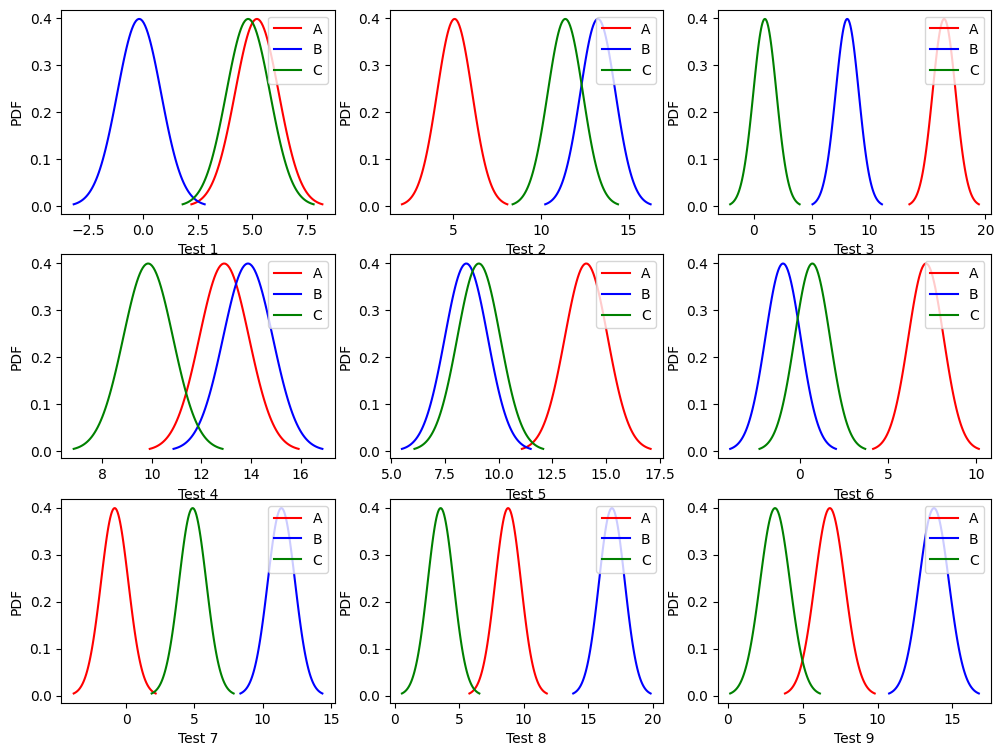

In [5]:
GMMHeuristic = Callable[[np.ndarray, int], Tuple[np.ndarray, np.ndarray, np.ndarray]]


def uniform_space_points_heuristic(points: np.ndarray, n_clusters: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Finds min and max for each point dimension and chooses cluster points uniformly.
    Covariance matrix is diagonal with variance equal to (points_var / n_clusters).

    Args:
        points: Data points
        n_clusters: Number of clusters

    Returns:
        Means array, covariance array
    """
    assert 1 <= n_clusters <= points.shape[0], f'Invalid number of clusters! Got {n_clusters}.'
    assert len(points.shape) == 2, f'Expected 2D data but got {points.shape}'
    dim = points.shape[1]

    p_min = np.min(points, axis=0)
    p_max = np.max(points, axis=0)
    p_range = p_max - p_min
    mus = p_min + np.random.uniform(low=0, high=1, size=n_clusters*dim).reshape(n_clusters, dim) * p_range
    sigmas = np.stack([np.eye(dim) for _ in range(n_clusters)])
    pis = np.ones(n_clusters) / n_clusters
    return mus, sigmas, pis


# Test implemented heuristic
n_axs_row = 3
n_axs_cols = 3
_, axs = plt.subplots(figsize=(12, 9), nrows=n_axs_row, ncols=n_axs_cols)
for i in range(n_axs_row):
    for j in range(n_axs_cols):
        index = i * n_axs_cols + j + 1
        h_mus, h_sigma, _ = uniform_space_points_heuristic(point_positions, 3)

        ax = axs[i][j]
        for m, s, color, name in zip(h_mus, h_sigma, ['red', 'blue', 'green'], ['A', 'B', 'C']):
            s = s.flatten()  # shape: (1, 1) -> shape (1,)
            plot_1d_gaussian_pdf(m, s, plot_params={'color': color, 'label': name}, ax=ax)
        ax.legend(loc='upper right')
        ax.set_xlabel('Position')
        ax.set_ylabel('PDF')
        ax.set_title(f'Test {index}')
plt.show()

The implemented heuristic is not ideal since it does not take into consideration dataset distribution. It might be necessary to rerun clustering multiple times with different starting parameters.

### GMM model implementation

For GMM model we first need to implement some key helper functions. Afterward we can implement the core component of GMM model - The EM algorithm.

We need to be able to calculate likelihood for each point with the respect to some cluster - $N_w(x_i|\mu_j, \Sigma_j)$. Using that we can easily calculate log likelihood (optimization function) - $\sum^{N}_{i=1} log(\sum^{K}_{j=1} \pi_j \cdot N_w(x_i|\mu_j, \Sigma_j))$.

Having likelihood for each point with the respect to some cluster also allows us to do intuitive classification: "Point cluster should be the cluster for which the point is most likely to come from" - $\arg \max_j N_w(x_i|\mu_j, \Sigma_j)$.



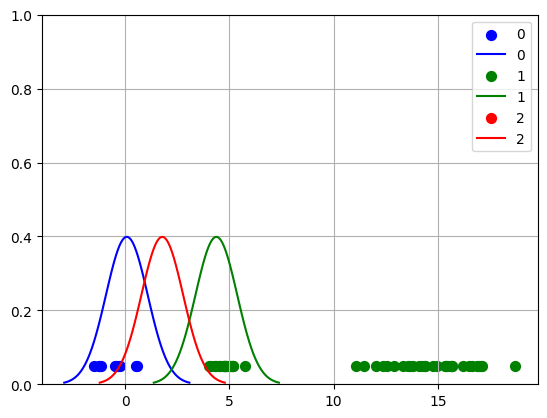

In [6]:
def calculate_point_likelihoods(X: np.ndarray, mus: np.ndarray, sigmas: np.ndarray) -> np.ndarray:
    """
    Calculates likelihood of each point with respect to each cluster.

    Args:
        X: Data points
        mus: Cluster means
        sigmas: Cluster covariances

    Returns:
        Array of shape (n, c) where n is number of data points and c is number of clusters.
    """
    likelihoods = []
    for mu, sigma in zip(mus, sigmas):
        likelihood = stats.multivariate_normal.pdf(X, mu, sigma)
        likelihoods.append(likelihood)

    likelihoods = np.vstack(likelihoods).T
    return likelihoods

def calculate_log_likelihood(X: np.ndarray, mus: np.ndarray, sigmas: np.ndarray, pis: np.ndarray) -> float:
    """
    Calculates log likelihood - optimization objective.
    Formula: sum[i=1..n] ln(sum[j=1..c]N(X[i]; mus[j], sigmas[j])

    Args:
        X: Data points
        mus: Cluster means
        sigmas: Cluster covariances
        pis: Cluster weights

    Returns:
        Log likelihood
    """
    likelihoods = calculate_point_likelihoods(X, mus, sigmas)
    normalization = np.sum(likelihoods * pis, axis=1)  # shape=(n,)
    return float(np.log(normalization).sum())

def classify_points_by_gaussians(X: np.ndarray, mus: np.ndarray, sigmas: np.ndarray) -> np.ndarray:
    """
    Classify points by the highest likelihood given a set of Gaussians clusters.

    Args:
        X: Data points
        mus: Cluster means
        sigmas: Cluster covariances

    Returns:
        Point classes (colors)
    """
    return np.argmax(calculate_point_likelihoods(X, mus, sigmas), axis=1)


# Test classification function
h_mus, h_sigma, _ = uniform_space_points_heuristic(point_positions, 3)
estimated_colors = classify_points_by_gaussians(point_positions, h_mus, h_sigma)
plot_1d_clusters(point_positions, estimated_colors, n_clusters=3, means=h_mus, stds=h_sigma.flatten(), points_height=0.05)
plt.show()

#### Algorithm reminder

0. Initialize model initial parameters $\mu_j$, $\Sigma_j$ and $\pi_j$ for every cluster $j$.
1. **Expectation:** Evaluate $\gamma_{j, x_i}$ for every cluster $j$ and data sample $x_i$.
2. **Maximization:** Estimate parameters $\mu_j$, $\Sigma_j$ and $\pi_j$ for every cluster based on $\gamma_{j, x_i}$.
3. Evaluate `log_likelihood` based on the model estimated parameters.

The implementation is slightly different from the algorithm: The `log_likelihood` is evaluated at the step 1 (expectation step) of the next iteration since some calculation elements are shared with evaluating $\gamma_{j, x_i}$ for clusters.

In [7]:
class GaussianMixtureModel:
    """
    Mixture of Gaussians generative model.
    """
    def __init__(
        self,
        n_clusters: int,
        max_iters: int = 10,
        heuristic: Optional[GMMHeuristic] = None
    ):
        """
        Args:
            n_clusters: Number of clusters
            max_iters: Maximum number of iterations
            heuristic: Initial state heuristic
        """
        self._n_clusters = n_clusters
        self._heuristic = heuristic if heuristic is not None else uniform_space_points_heuristic

        # Stopping criteria
        self._max_iters = max_iters

        # State
        self._mus = None
        self._sigmas = None
        self._pis = None

    @property
    def clusters(self) -> int:
        """
        Get number of clusters.

        Returns:
            Number of clusters
        """
        return self._n_clusters

    @property
    def mus(self) -> np.ndarray:
        """
        Get cluster means.

        Returns:
            Cluster means.
        """
        return self._mus

    @property
    def sigmas(self) -> np.ndarray:
        """
        Get cluster covariances

        Returns:
            Cluster covariances
        """
        return self._sigmas

    @property
    def pis(self) -> np.ndarray:
        """
        Get cluster weights.

        Returns:
            Cluster weights
        """
        return self._pis

    def _e_step(self, X: np.ndarray, mus: np.ndarray, sigmas: np.ndarray, pis: np.ndarray) -> Tuple[np.ndarray, float]:
        """
        Performs expectation step - estimate gamma and likelihood.

        Args:
            X: Data points
            mus: Previous cluster means
            sigmas: Previous cluster covariances
            pis: Previous cluster weight coefficients

        Returns:
            Gammas, Log likelihood
        """
        n = X.shape[0]

        likelihoods = calculate_point_likelihoods(X, mus, sigmas)  # shape=(n, n_clusters)
        normalization = np.sum(likelihoods * pis, axis=1)  # shape=(n,)
        log_likelihood = float(np.log(normalization).sum())

        # Calculate Gammas
        gamma = np.zeros(shape=(self._n_clusters, n), dtype=np.float32)
        for c_j in range(self._n_clusters):
            likelihood = likelihoods[:, c_j]
            pi_j = pis[c_j]
            for d_i in range(X.shape[0]):
                gamma[c_j, d_i] = pi_j * likelihood[d_i] / normalization[d_i]

        return gamma, log_likelihood

    def _m_step(self, X: np.ndarray, gammas: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        """
        Performs maximization step - estimate parameters

        Args:
            X: Data points
            gammas: Gamma values

        Returns:
            Cluster means, covariances, weights
        """
        n, dim = X.shape

        mus, sigmas, pis = [], [], []
        for c_j in range(self._n_clusters):
            n_j = gammas[c_j, :].sum()
            mu_j = sum([gammas[c_j, d_i] * X[d_i] for d_i in range(n)]) / n_j
            offsets_j = (X - mu_j).reshape(n, dim, 1)  # converting array to Nx1 vector for matrix multiplication
            sigma_j = sum([gammas[c_j, d_i] * offsets_j[d_i] @ offsets_j[d_i].T for d_i in range(n)]) / n_j
            pi_j = n_j / n

            mus.append(mu_j)
            sigmas.append(sigma_j)
            pis.append(pi_j)

        mus = np.stack(mus)
        sigmas = np.stack(sigmas)
        pis = np.stack(pis)

        return mus, sigmas, pis

    def fit(self, X: np.ndarray) -> Dict[str, Any]:
        """
        Performs EM algorithm to fit GMM to the data.

        Args:
            X: 2D Data

        Returns:
            State for each EM step.
        """
        mus, sigmas, pis = self._heuristic(X, self._n_clusters)
        history = {
            'mu': [mus],
            'sigma': [sigmas],
            'pi': [pis],
            'log_likelihood': []  # Note: log_likelihood is evaluated using old parameters (one step lag)
        }

        for iteration in range(self._max_iters):
            gammas, log_likelihood = self._e_step(X, mus, sigmas, pis)
            mus, sigmas, pis = self._m_step(X, gammas)

            history['mu'].append(mus)
            history['sigma'].append(sigmas)
            history['pi'].append(pis)
            history['log_likelihood'].append(log_likelihood)

        # Postprocessing - normalizing weights in order for them to sum up to 1
        pis /= pis.sum()

        self._mus = mus
        self._sigmas = sigmas
        self._pis = pis
        history['log_likelihood'].append(self.log_likelihood(X))

        return history

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Classifies data points bu cluster classes.
        Point class is chosen by the highest likelihood with respect to some cluster.

        Args:
            X: Data points

        Returns:
            Classes (colors)
        """
        return classify_points_by_gaussians(X, self._mus, self._sigmas)

    def log_likelihood(self, X: np.ndarray) -> float:
        """
        Calculates log likelihood for given data points.

        Args:
            X: Data points

        Returns:
            Log likelihood
        """
        return calculate_log_likelihood(X, self._mus, self._sigmas, self._pis)

    def sample(self, n: int, cluster: int = -1) -> np.ndarray:
        """
        Generate new samples. Since GMM is a generative probabilistic model it can generate new samples.

        Args:
            n: Number of samples to generate
            cluster: Generate samples from specific cluster (optional_

        Returns:
            Generated samples.
        """
        result = []
        for _ in range(n):
            chosen_cluster = cluster
            if chosen_cluster == -1:  # Cluster not chosen (generate random)
                chosen_cluster = np.random.choice(self._n_clusters, p=self.pis)

            new_sample = np.random.multivariate_normal(self._mus[chosen_cluster], self._sigmas[chosen_cluster])
            result.append(new_sample)

        return np.stack(result)

#### Testing model on generated synthetic dataset

If we run this algorithm multiple times we shall get different results. This is because EM gets stuck in a local maxima. It is a lot dependent on the initial parameters.

Log likelihood updates: [-1264.962332132692, -179.7237051325721, -178.09858452835027, -176.42018864702482, -174.599532556669, -173.1377826630866, -172.63839725156674, -172.5773809770609, -172.5622175342769, -172.55358518712393, -172.54798948677725, -172.54413840125557, -172.54132731031748]
Cluster weights: [0.1511762  0.34785417 0.50096963]


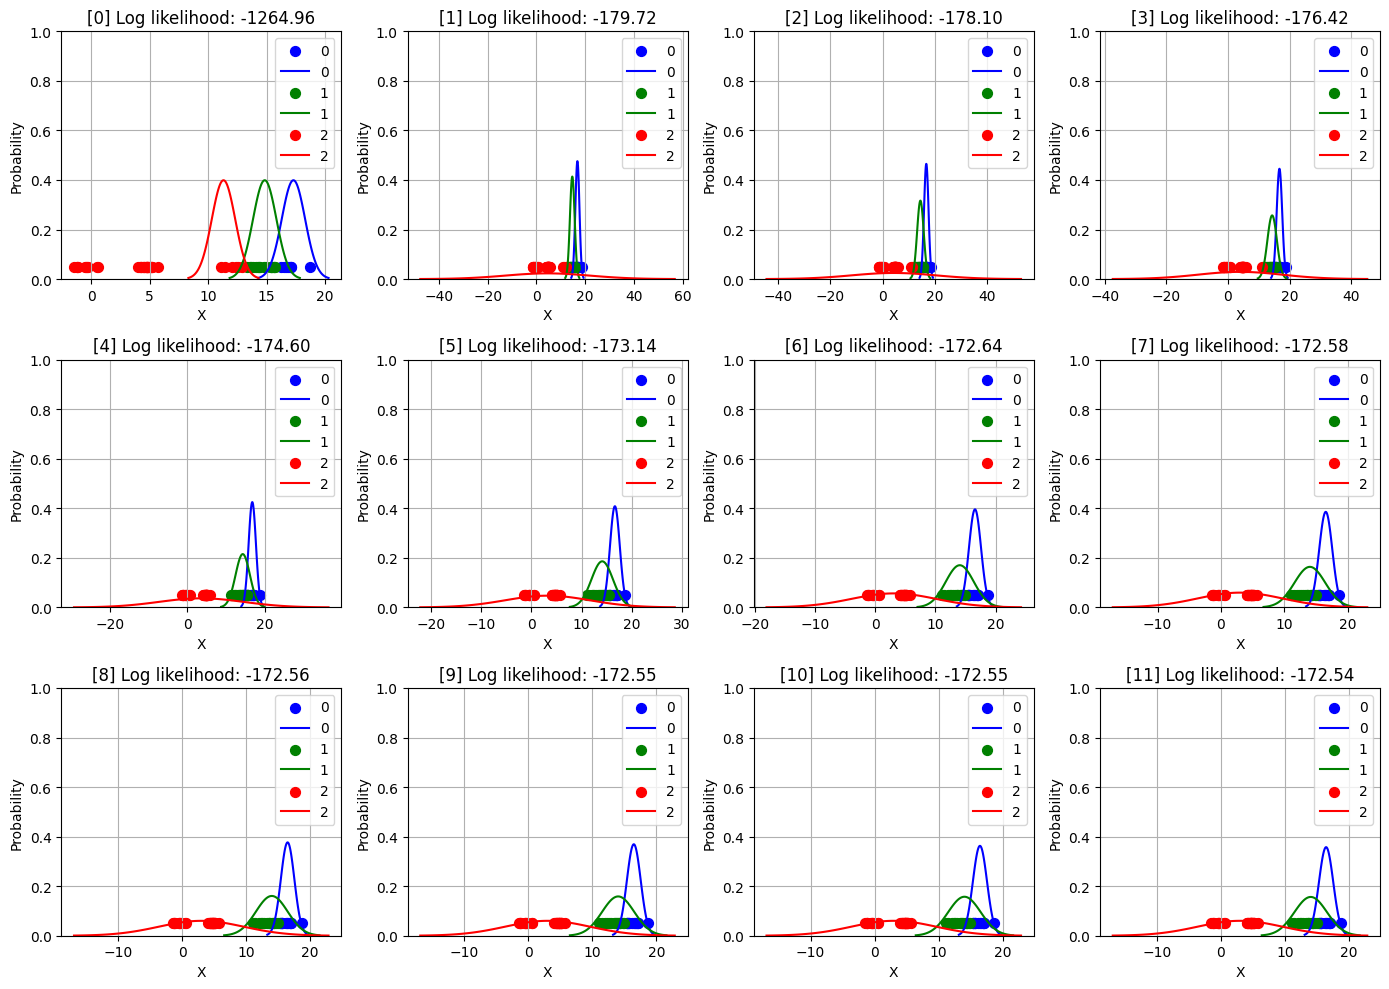

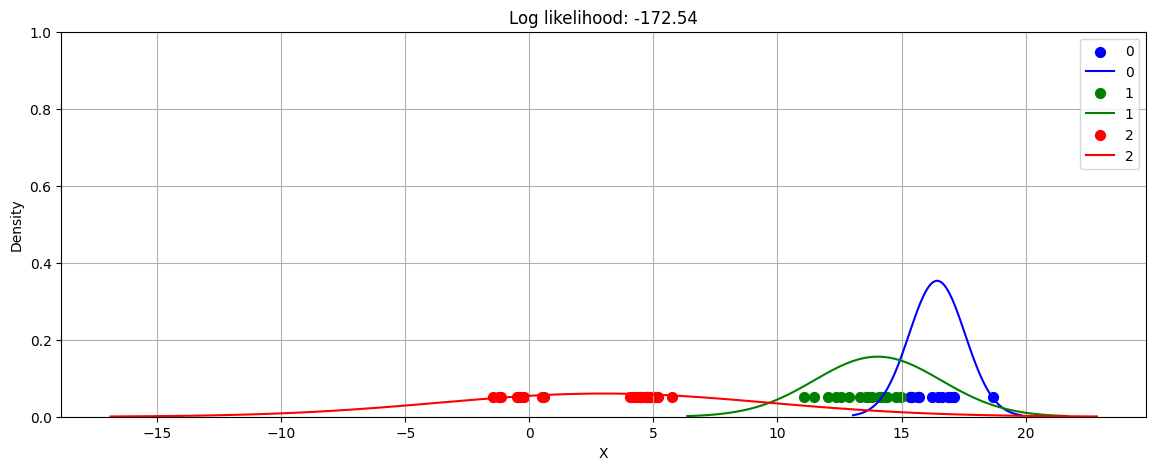

In [8]:
N_ITERS = 12


def run_gmm_experiment(model: GaussianMixtureModel, data: np.ndarray) -> None:
    """
    Simulates model training for each step.

    Args:
        model: GMM model
        data: data points
        n_clusters: Number of clusters
    """
    n_iters = N_ITERS
    history = model.fit(data)
    print('Log likelihood updates:', history['log_likelihood'])
    print('Cluster weights:', model.pis)

    iter_cols = 4
    iter_rows = 3
    assert iter_cols * iter_rows == n_iters

    _, axs = plt.subplots(figsize=(14, 10), nrows=iter_rows, ncols=iter_cols)

    for i in range(iter_rows):
        for j in range(iter_cols):
            h_index = i * iter_cols + j
            ax = axs[i][j]
            mus = history['mu'][h_index]
            sigmas = history['sigma'][h_index].reshape(-1)
            log_likelihood = history['log_likelihood'][h_index]

            # Plot
            estimated_colors = classify_points_by_gaussians(data, mus, sigmas)
            plot_1d_clusters(data, estimated_colors, n_clusters=model.clusters, means=mus, stds=sigmas, ax=ax, points_height=0.05)
            ax.set_xlabel('X')
            ax.set_ylabel('Probability')
            ax.set_title(f'[{h_index}] Log likelihood: {log_likelihood:.2f}')

    plt.tight_layout()
    plt.show()

    _, ex_ax = plt.subplots(figsize=(14, 5))
    estimated_colors = model.predict(data)
    plot_1d_clusters(data, estimated_colors, n_clusters=ex_n, means=model.mus, stds=model.sigmas.reshape(-1),
                     ax=ex_ax, points_height=0.05)
    plt.xlabel('X')
    plt.ylabel('Density')
    plt.title(f'Log likelihood: {model.log_likelihood(data):.2f}')
    plt.show()


run_gmm_experiment(
    model=GaussianMixtureModel(n_clusters=3, max_iters=N_ITERS),
    data=point_positions
)

I seems that EM algorithm converged around step 6 but there was not too much improvement after first step (step 0 is from heuristic).

#### Comparison to the ground truth

Based on the `log likelihood` and visual comparison we can see that the results are worse than the ground truth. We shall see if using K-Means for parameters initialization improves the results.

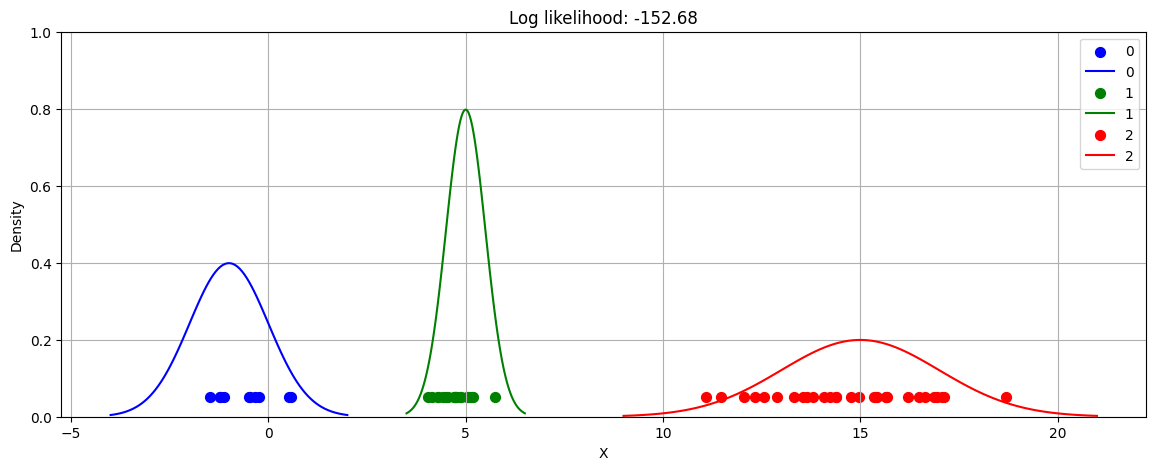

In [9]:
_, ex_ax = plt.subplots(figsize=(14, 5))
log_likelihood = calculate_log_likelihood(point_positions, mus=ex_means, sigmas=ex_stds, pis=ex_pis)
plot_1d_clusters(point_positions, point_colors, n_clusters=ex_n, means=ex_means, stds=ex_stds, ax=ex_ax, points_height=0.05)
ex_ax.set_xlabel('X')
ex_ax.set_ylabel('Density')
ex_ax.set_title(f'Log likelihood: {log_likelihood:.2f}')
plt.show()

/Users/momiradzemovic/Desktop/main-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Log likelihood updates: [-188.0006677475793, -147.96861958405663, -141.84225731981255, -141.8016575447304, -141.8016575240328, -141.80165752403246, -141.80165752403246, -141.80165752403246, -141.80165752403246, -141.80165752403246, -141.80165752403246, -141.80165752403246, -141.80165752403246]
Cluster weights: [0.16666667 0.50000067 0.33333267]


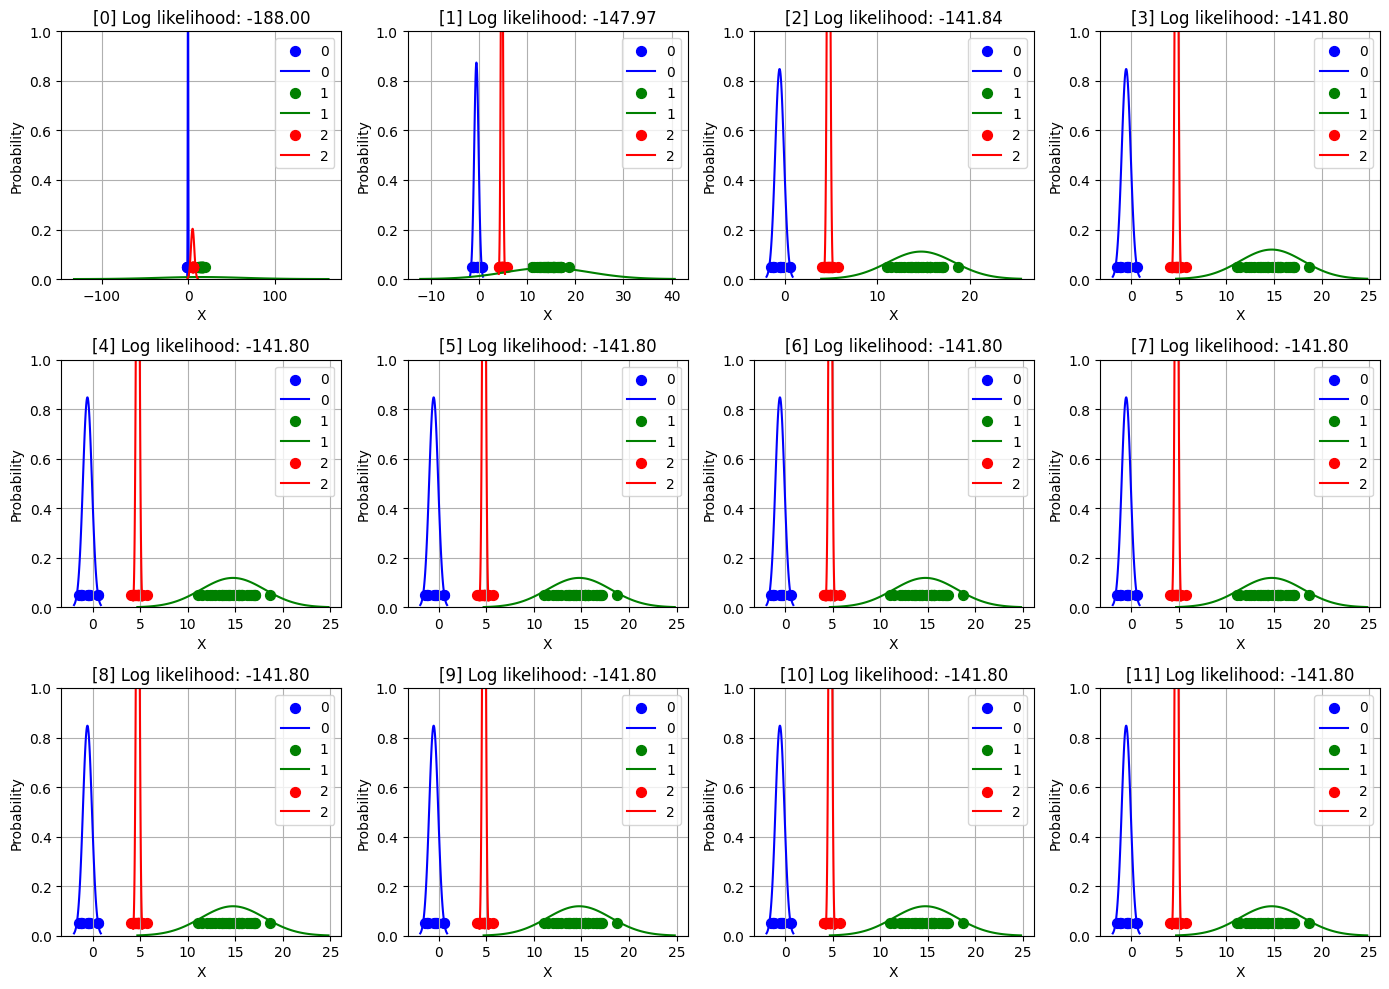

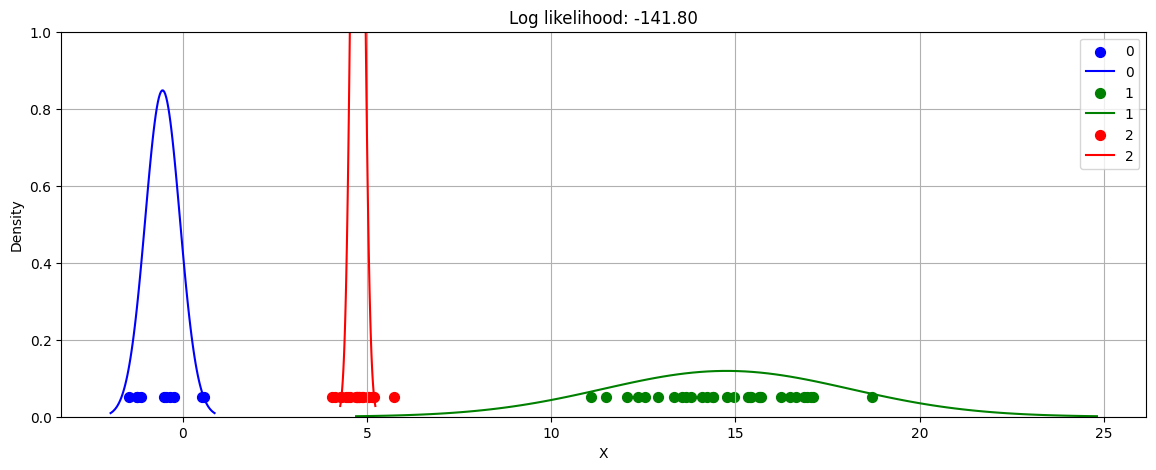

In [10]:
def create_kmeans_heuristic(max_iter: int) -> GMMHeuristic:
    """
    Wrapper for `scikit-learn` KMeans algorithm.

    Cluster means: This is equivalent to cluster centroids.
    Cluster covariances: This is equivalent to `v*I` where v is variance and I is identity matrix.
    Cluster weights: This is equivalent to `1 / K` where K is number of clusters.ix.

    Args:
        max_iter: Maximum number of iterations.

    Returns:
        Starting parameters.
    """
    def kmeans(points: np.ndarray, n_clusters: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        dim = points.shape[1]

        kmeans_model = KMeans(n_clusters=n_clusters, max_iter=max_iter)
        kmeans_model.fit(points)

        mus = kmeans_model.cluster_centers_

        groups = kmeans_model.predict(points)
        Xg = np.hstack([points, groups.reshape(-1, 1)])
        sigmas = []
        for grp in range(n_clusters):
            Xg_cluster = Xg[Xg[:, -1] == grp]
            var = Xg_cluster.var()
            sigmas.append(var * np.eye(dim))

        sigmas = np.stack(sigmas)
        pis = np.ones(n_clusters) / n_clusters
        return mus, sigmas, pis

    return kmeans


model = GaussianMixtureModel(n_clusters=3, max_iters=N_ITERS, heuristic=create_kmeans_heuristic(5))
run_gmm_experiment(
    model=model,
    data=point_positions
)

New results are a lot better. With better initial parameters model found better local maxima. Based on the `log likelihood` it can be seed that model is bit overfitted.

#### Comparison to the `scikit-learn` implementation.

The `scikit-learn` gives similar results to the implemented model.

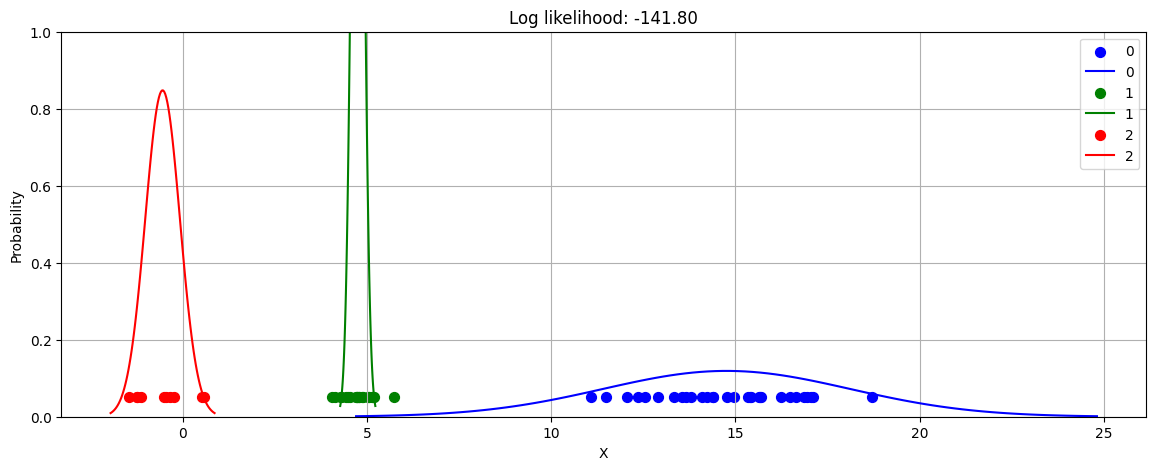

In [11]:
gm = GaussianMixture(n_components=3).fit(point_positions)
skl_colors = gm.predict(point_positions).reshape(-1)
skl_means = gm.means_.reshape(-1)
skl_covariances = gm.covariances_.reshape(-1)
skl_weight = gm.weights_

_, ex_ax = plt.subplots(figsize=(14, 5))
log_likelihood = calculate_log_likelihood(point_positions, mus=skl_means, sigmas=skl_covariances, pis=skl_weight)
plot_1d_clusters(point_positions, skl_colors, n_clusters=ex_n, means=skl_means, stds=skl_covariances, ax=ex_ax, points_height=0.05)
ex_ax.set_xlabel('X')
ex_ax.set_ylabel('Probability')
ex_ax.set_title(f'Log likelihood: {log_likelihood:.2f}')
plt.show()

#### Generating new samples

Since Gaussian mixture model is a probabilistic generative model we can generate new samples from random or specific cluster.

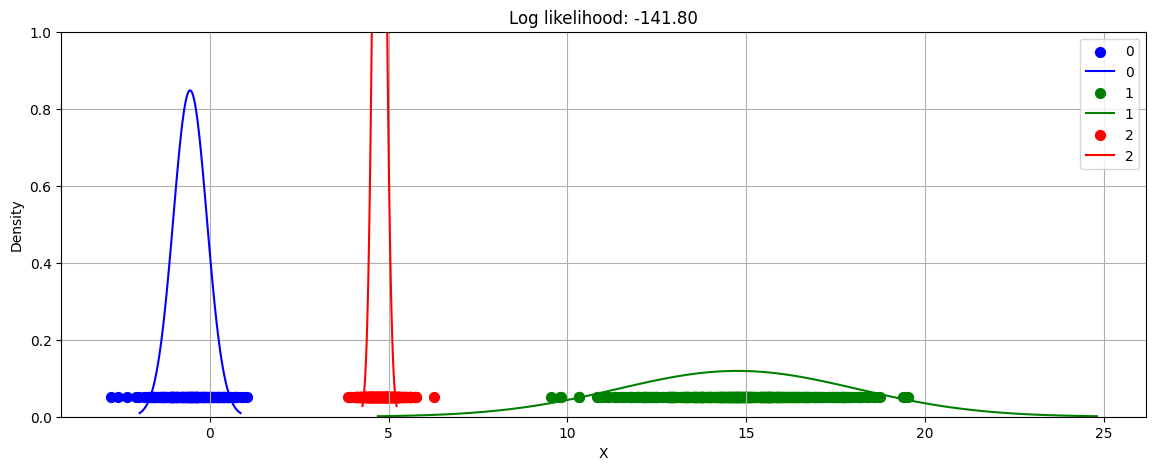

In [12]:
gen_points = model.sample(1000)
gen_colors = model.predict(gen_points)
_, ex_ax = plt.subplots(figsize=(14, 5))
plot_1d_clusters(gen_points, gen_colors, n_clusters=model.clusters, means=model.mus, stds=model.sigmas.reshape(-1),
                 ax=ex_ax, points_height=0.05)
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f'Log likelihood: {model.log_likelihood(point_positions):.2f}')
plt.show()

### Synthetic 2D dataset

Same like in the 1D case but the data is 2D. Working with 2D datasets requires specific support:
- Creating 2D dataset;
- Visualizing 2D cluster points;
- Visualizing 2D cluster pdf contours (distributions).

/var/folders/81/mw66j0n930x49cnqfx9bq9_m0000gp/T/ipykernel_12535/1500401495.py:26: RuntimeWarning: covariance is not positive-semidefinite.
  p = np.random.multivariate_normal(c_mean, c_cov, c_size)


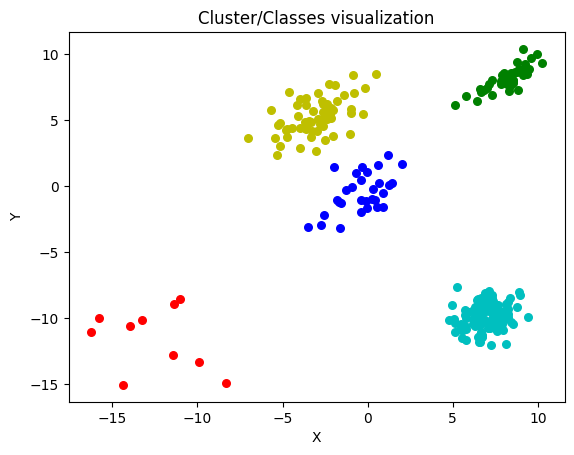

In [13]:
def create_cluster_dataset(
    n: int,
    sizes: np.ndarray,
    means: np.ndarray,
    covs: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Creates dataset consisting of `n` Gaussian clusters with defined sizes, means and covariance matrices.

    Args:
        n: Number of clusters
        sizes: Cluster sizes
        means: Cluster means
        covs: Cluster covariance matrices

    Returns:
        Samples, Sample colors (clusters
    """
    assert n == len(sizes)
    assert n == len(means)
    assert n == len(covs)

    positions = []
    colors = []
    for c_id, (c_size, c_mean, c_cov) in enumerate(zip(sizes, means, covs)):
        p = np.random.multivariate_normal(c_mean, c_cov, c_size)
        c = np.ones(c_size) * c_id
        positions.append(p)
        colors.append(c)

    positions = np.vstack(positions)
    colors = np.hstack(colors)
    return positions, colors


def plot_clusters_data(
    X: np.ndarray,
    colors: np.ndarray,
    color_list: List[str],
    ax: Optional[plt.Axes] = None
) -> None:
    """
    Visualizes data by coloring scattered points by their true or predicted class color.

    Args:
        X: Data points
        colors: Colors for data points
        color_list: List of colors
        ax: matplotlib Axes
    """
    assert X.shape[0] == colors.shape[0]
    unique_colors = np.unique(colors)

    Xc = np.hstack([X, colors.reshape(-1, 1)])
    for c in unique_colors:
        Xc_cluster = Xc[Xc[:, 2] == c]

        if ax is None:
            plt.scatter(Xc_cluster[:, 0], Xc_cluster[:, 1], color=color_list[int(c)], s=30, label=f'{c}')
        else:
            ax.scatter(Xc_cluster[:, 0], Xc_cluster[:, 1], color=color_list[int(c)], s=30, label=f'{c}')

    if ax is None:
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Cluster/Classes visualization')
    else:
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('Cluster/Classes visualization')


def plot_cluster_contours(
    mus: np.ndarray,
    sigmas: np.ndarray,
    radius_coef: int = 4,
    n_points: int = 30,
    ax: Optional[plt.Axes] = None
) -> None:
    """
    Plots contours of 2d Gaussians in order to visualize cluster distributions.

    Args:
        mus: Cluster means
        sigmas: Cluster sigmas
        radius_coef: Radius coef (contour completeness)
        n_points: Number of points to sample to plot the grid (contour quality)
        ax: matplotlib Ax
    """
    for c, (mu, sigma) in enumerate(zip(mus, sigmas)):
        # Create grid of points around cluster
        # And calculate density for each point
        # Plot contour based on point coordinates and its density
        radius_x = radius_coef * sigma[0, :].max()
        radius_y = radius_coef * sigma[1, :].max()
        x = np.linspace(mu[0] - radius_x, mu[0] + radius_x, n_points)
        y = np.linspace(mu[1] - radius_y, mu[1] + radius_y, n_points)
        grid = np.dstack(np.meshgrid(x, y))
        density = stats.multivariate_normal.pdf(grid, mu, sigma)

        if ax is None:
            plt.contour(x, y, density, cmap='YlOrRd')
        else:
            ax.contour(x, y, density, cmap='YlOrRd')


N_CLUSTERS = 5
SIZES = np.array([10, 30, 40, 60, 100])
MEANS = np.array([
    [-12, -12],
    [0, 0],
    [8, 8],
    [-3, 5],
    [7, -10]
])
COVS = np.array([
    [[1, 5], [5, 1]],
    [[1, 2], [2, 1]],
    [[1, 1.3], [1.3, 1]],
    [[1, 2], [2, 1]],
    [[0.3, 1], [1, 0.3]]
])

# Test dataset creation
COLOR_LIST = ['r', 'b', 'g', 'y', 'c']
positions_2d, colors_2d = create_cluster_dataset(N_CLUSTERS, SIZES, MEANS, COVS)
plot_clusters_data(positions_2d, colors_2d, color_list=COLOR_LIST)
plt.show()

/Users/momiradzemovic/Desktop/main-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Log likelihood updates: [-1553.1415330857953, -1148.3755065381351, -1064.276161490157, -1055.1851645517736, -1054.4255652078991, -1054.4187463515482, -1054.4186697970974, -1054.4186666252608]
Cluster weights: [0.25018034 0.41666666 0.04166667 0.16666647 0.12481986]


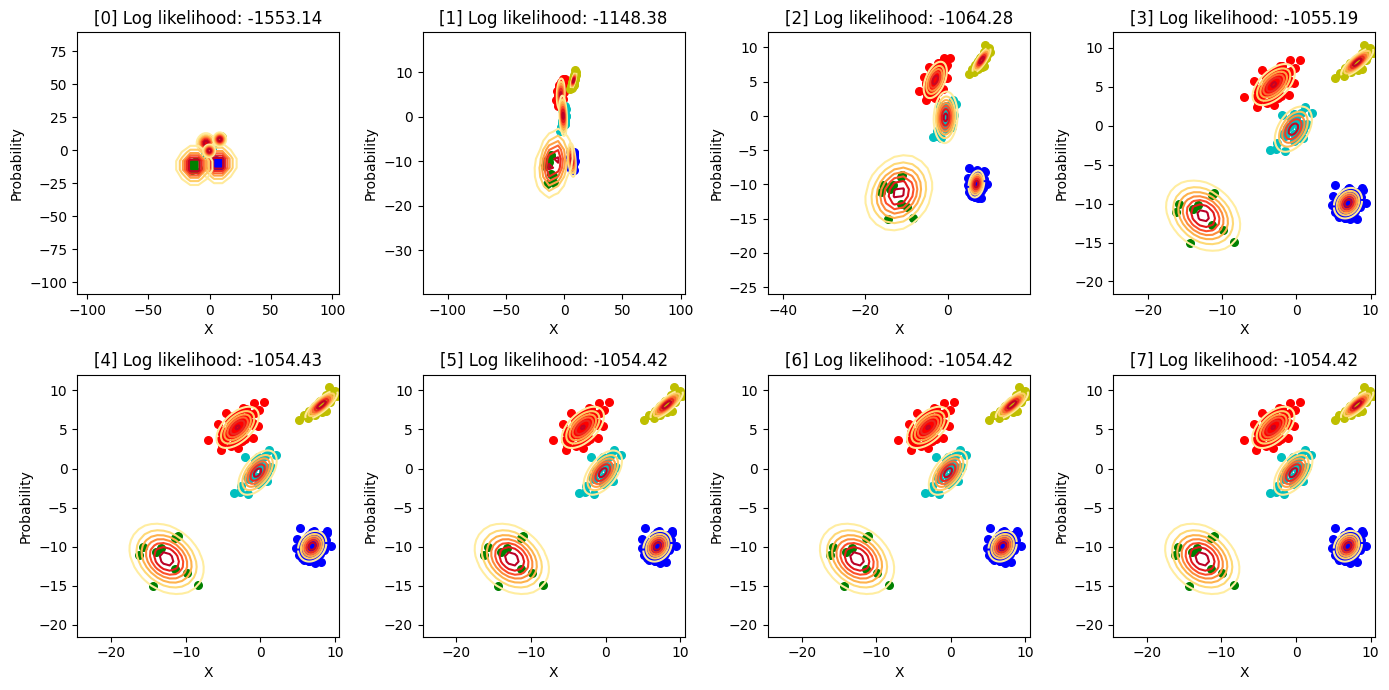

In [14]:
def run_gmm_experiment_2d(model: GaussianMixtureModel, data: np.ndarray, n_iters: int, color_list: List[str]) -> None:
    """
    Simulates model training for each step. Like `run_gmm_experiment` but transformed for 2D data.

    Args:
        model: GMM model
        data: Data points
        n_iters: Training iterations
        color_list: Color list
    """
    history = model.fit(data)
    print('Log likelihood updates:', history['log_likelihood'])
    print('Cluster weights:', model.pis)

    iter_cols = 4
    iter_rows = 2
    assert iter_cols * iter_rows == n_iters

    _, axs = plt.subplots(figsize=(14, 7), nrows=iter_rows, ncols=iter_cols)

    for i in range(iter_rows):
        for j in range(iter_cols):
            h_index = i * iter_cols + j
            ax = axs[i][j]
            mus = history['mu'][h_index]
            sigmas = history['sigma'][h_index]
            log_likelihood = history['log_likelihood'][h_index]

            # Plot
            estimated_colors = classify_points_by_gaussians(data, mus, sigmas)
            plot_clusters_data(positions_2d, estimated_colors, color_list=color_list, ax=ax)
            plot_cluster_contours(mus, sigmas, radius_coef=2, ax=ax)
            ax.set_xlabel('X')
            ax.set_ylabel('Probability')
            ax.set_title(f'[{h_index}] Log likelihood: {log_likelihood:.2f}')

    plt.tight_layout()
    plt.show()


experiment_2d_iterations = 7
run_gmm_experiment_2d(
    model=GaussianMixtureModel(n_clusters=5, heuristic=create_kmeans_heuristic(10), max_iters=experiment_2d_iterations),
    data=positions_2d,
    n_iters=experiment_2d_iterations+1,
    color_list=COLOR_LIST
)

/Users/momiradzemovic/Desktop/main-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


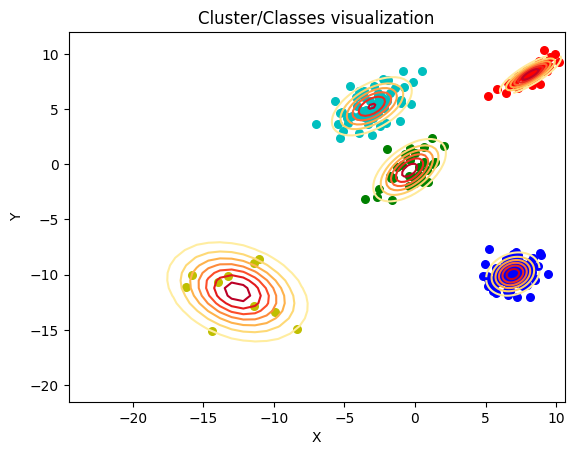

In [15]:
model = GaussianMixtureModel(
    n_clusters=N_CLUSTERS,
    heuristic=create_kmeans_heuristic(5)
)
_ = model.fit(positions_2d)
y_pred = model.predict(positions_2d)

plot_clusters_data(positions_2d, y_pred, color_list=COLOR_LIST)
plot_cluster_contours(model.mus, model.sigmas, radius_coef=2)
plt.show()

### The Iris dataset

Testing model on another toy flower dataset that has 3 classes. We shall see if the unsupervised model is able to find those three classes.

The Iris dataset has 150 samples and every sample has 4 features:
- `sepal length (cm)`
- `sepal width (cm)`
- `petal length (cm)`
- `petal width (cm)`

Only `sepal length (cm)` and `petal length (cm)` will be used for easier visualization.

Dataset shape: (150, 2) (150,)


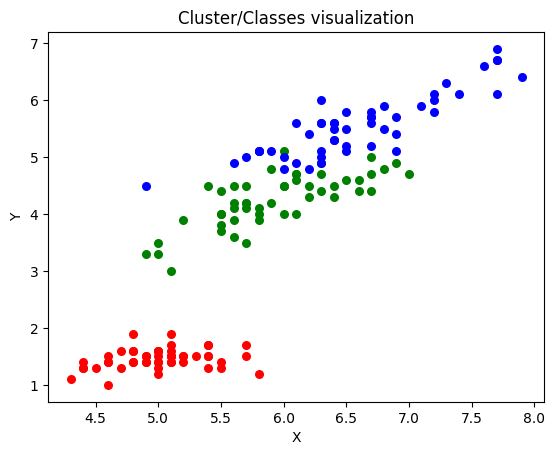

In [16]:
data = load_iris()
X = data['data'][:, [0, 2]]  #
y = data['target']

N_CLASSES = 3
COLOR_LIST = ['red', 'green', 'blue']

print('Dataset shape:', X.shape, y.shape)

plot_clusters_data(X, y, color_list=COLOR_LIST)
plt.show()

/Users/momiradzemovic/Desktop/main-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


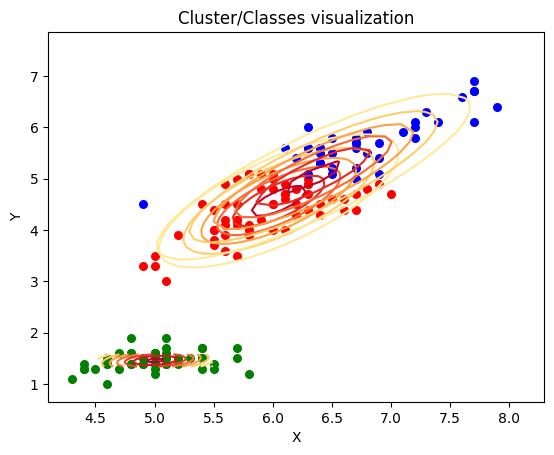

In [17]:
model = GaussianMixtureModel(
    n_clusters=N_CLASSES,
    heuristic=create_kmeans_heuristic(5)
)
_ = model.fit(X)
y_pred = model.predict(X)


plot_clusters_data(X, y_pred, color_list=COLOR_LIST)
plot_cluster_contours(model.mus, model.sigmas)
plt.show()

We can see that the model managed to find clusters that are similar to the original class cluster. That is because this dataset has it's natural clusters. For real practical data the clusters are usually not so "pretty".

#### Using GMM as a classifier

Even if GMM was trained using unsupervised approach it can still be for classification. Minor problem with GMM as classifier if it is learning using unsupervised approach is that cluster labels probably do not match the dataset labels. If the dataset conssists of three different labels that form three Gaussian clusters then GMM can give 3! different "good" solutions (by permuting labels/colors). One way to fix this is to to map cluster labels to class labels by how many points from cluster match that label.